# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.
# Let's inspect the df first.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
summary = df.describe()
print(summary)

       temperature  heart_rate
count   130.000000  130.000000
mean     98.249231   73.761538
std       0.733183    7.062077
min      96.300000   57.000000
25%      97.800000   69.000000
50%      98.300000   74.000000
75%      98.700000   79.000000
max     100.800000   89.000000


## SUMMARY
Sample size = 130
/ Mean = 98.25$^{\circ}$F
/ Standard Deviation = 0.73$^{\circ}$F
/ Median = 98.3$^{\circ}$F

So far, it looks like the mean is close to what Carl Wunderlich said (98.25$^{\circ}$F  vs. 98.6$^{\circ}$F). But we will need to check if it really is statistically correct.

## Is the distribution of the body temperature normal?
Easiest way to answer this is using graphical methods. In normality tests, usually use histograms and QQ plot.

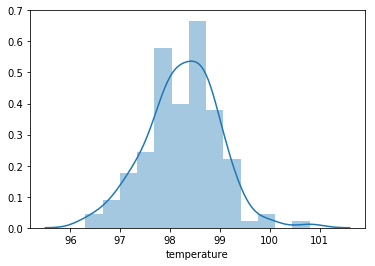

In [5]:
# Let's start with histogram.
sns.distplot(df.temperature, label='temperature')
plt.show()

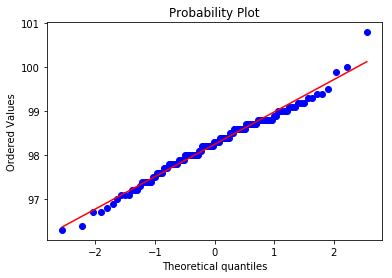

In [6]:
# Looks relatively normal. How about the QQ Plot?
# Looks like sns doesn't have qq plot option. Use SciPy (could also use statsmodels.api if you wanted to)
import pylab

stats.probplot(df.temperature, dist="norm", plot=pylab)
pylab.show()

### Answer: Yes.
The histogram distribution looks about normal and there is a linearity in the QQ Plot which implies normality.

## Is the sample size large? Are the observations independent?
Looking back at the summary, the sample size is 130, which is large enough (interestingly the rule of thumb for large sample size is apparently n = 30). The observations are independent as they do not influence each other (each observation is a person).

So, Central Limit Theorem can apply.

## Is the true population mean really 98.6$^{\circ}$F?
Null hypothesis = Yes

Reject Null hypothesis = No (True population mean body temperature is not 98.6$^{\circ}$F)

First do a bootstrap hypothesis test.

In [7]:
# first define a bootstrap function
def bootstrap_replicate(data, func): 
    return func(np.random.choice(data, len(data)))

# then draw replicates
def draw_bs_reps(data, func, size = 1):
    rep = np.empty(size)
    
    for i in range(size):
        rep[i] = bootstrap_replicate(data, func)
        
    return rep

98.2491640769
0.0640566146952
0.0636109485157


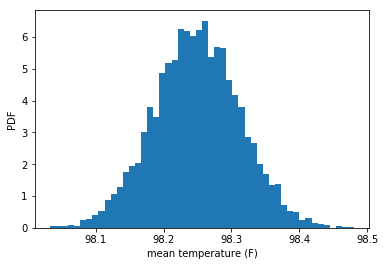

In [8]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(df.temperature, np.mean, size=10000)

bs_mean = np.mean(bs_replicates)
print('mean =', bs_mean)

# Compute and print SEM
sem = np.std(df.temperature) / np.sqrt(len(df.temperature))
print('sem =', sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print('std =', bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean temperature (F)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [9]:
# Looks like the plot distribution is about normal and the SEMs look comparable too. Let's check p value
# Compute and print p-value: p
empirical_diff_means = np.mean(df.temperature) - bs_mean

p = np.sum(bs_replicates <= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)

p-value = 0.0


P value is extremely small (less than even 0.01) so we can reject the null hypothesis, which means that we have enough reason to say that the true population mean body temperature is not 98.6$^{\circ}$F.

To double check, let's try a frequentist statistical testing. We should use a _one sample_ test because only one set of data is compared to a single value (temperature). 

$z$ statistic is preferred since the sample size is larger than 30 (n=130). $t$ statistic is used when the sample size is smaller. Regardless we will do both tests and see if there are any differences.

In [10]:
# Calculates z value and performs z test
z = (np.mean(df.temperature) - 98.6) / (np.std(df.temperature) / np.sqrt(len(df.temperature)))
print('z =', z)

# Calculate and save p-value:
p = stats.norm.cdf(z) * 2
print('p =', p)

z = -5.47592520208
p = 4.35231516588e-08


In [11]:
# Perform t test now
t = stats.ttest_1samp(df.temperature, 98.6)[0]
p = stats.ttest_1samp(df.temperature, 98.6)[1]

print('t =', t)
print('p =', p)

t = -5.45482329236
p = 2.41063204156e-07


$z$ and $t$ values are similar (5 std away from mean is pretty far...) and both $p$ values are very small. They both support the bootstrap hypothesis test and reject the null hypothesis.

## Draw a small sample of size 10 from the data and repeat both frequentist tests.

Now that the sample size is small, a $t$ test is more suitable since we also do not know the standard deviation of the population.

In [12]:
sample = np.random.choice(df.temperature, size=10)
print(sample)

t = stats.ttest_1samp(sample, 98.6)[0]
p = stats.ttest_1samp(sample, 98.6)[1]

print('t =', t)
print('p =', p)

[  98.8  100.    97.4   99.5   98.    98.    97.8   98.    99.4   97.8]
t = -0.463465391877
p = 0.654034768399


In [13]:
z = (np.mean(sample) - 98.6) / (np.std(sample) / np.sqrt(len(sample)))
p = stats.norm.cdf(z) * 2

print('z =', z)
print('p =', p)

z = -0.488535418331
p = 0.625170644652


The $p$ values are very different, which demonstrates the importance of applying the proper statistical test depending on your sample size. Like mentioned before, $t$ tests are for smaller samples < 30 and $z$ tests are for larger samples > 30.

## At what temperature should we consider someone's temperature to be "abnormal"?

In [15]:
# For the bootstrap sample:
b_CI = np.percentile(bs_replicates, [0.05, 99.95])
print('99.9% Confidence Interval:', b_CI)

99.9% Confidence Interval: [ 98.04461462  98.46846192]


In [18]:
# for the frequentist methods: margin of error and CI

z_value = 3.3 # this is the value of z for 99.9% confidence

moe = z_value * np.std(df.temperature) / np.sqrt(len(df.temperature))

f_CI = np.array([np.mean(df.temperature) - moe, np.mean(df.temperature) + moe])

print('mean =', np.mean(df.temperature))
print('margin of error =', moe)
print('99.9% Confidence Interval:', f_CI)

mean = 98.24923076923078
margin of error = 0.211386828494
99.9% Confidence Interval: [ 98.03784394  98.4606176 ]


Based on the two confidence intervals given, we can say any temperatures outside of 98.04$^{\circ}$ and 98.47$^{\circ}$ (being generous) are abnormal. Even Wunderlich's temperature of 98.6$^{\circ}$ falls outside of this range and is considered to be "abnormal."

## Is there a significant difference between males and females in normal temperature?

A two sample permutation test is the best approach to answering this question as we are testing if both samples (males and females) are coming from the same distribution or not:

Null Hypothesis: No significant difference between males and females in normal temperature.

Let's do a brief exploratory analysis to see what the result might look like.

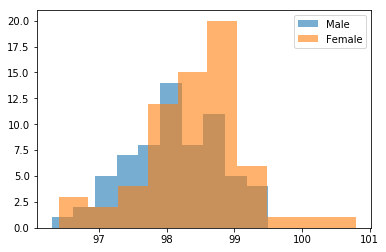

In [26]:
plt.hist(df[df.gender=="M"].temperature.reset_index(drop=True), alpha=0.6, label="Male")
plt.hist(df[df.gender=="F"].temperature.reset_index(drop=True), alpha=0.6, label="Female")
plt.legend()
plt.show()

In [30]:
# Immediately, I see a difference in the mean temperatures between males and females (female's temperatures are higher).

m_temp = df[df.gender == "M"]
f_temp = df[df.gender == "F"]

m_temp.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.104615,73.369231
std,0.698756,5.875184
min,96.300000,58.000000
25%,97.600000,70.000000
50%,98.100000,73.000000
75%,98.600000,78.000000
max,99.500000,86.000000


In [29]:
f_temp.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.393846,74.153846
std,0.743488,8.105227
min,96.400000,57.000000
25%,98.000000,68.000000
50%,98.400000,76.000000
75%,98.800000,80.000000
max,100.800000,89.000000


In [36]:
# Define permutation functions:

def permutation_sample(data1, data2):
    """Return a permutation sample from two data sets."""

    # Concatenate the data sets:
    data = np.concatenate((data1, data2))

    # Permute the concatenated array:
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two samples:
    permutation_sample_1 = permuted_data[:len(data1)]
    permutation_sample_2 = permuted_data[len(data1):]

    return permutation_sample_1, permutation_sample_2


def draw_permutation_replicates(data_1, data_2, func, size=1):
    """Draw multiple permutation replicates."""

    # Initialize array of permutation replicates:
    permutation_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation samples:
        permutation_sample_1, permutation_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic:
        permutation_replicates[i] = func(permutation_sample_1, permutation_sample_2)

    return permutation_replicates


def diff_of_means(data_1, data_2):
    """Return the difference in means of two arrays."""

    # The difference of means of data_1, data_2:
    return np.mean(data_1) - np.mean(data_2)

In [42]:
# Compute difference of means:
empirical_difference = diff_of_means(f_temp.temperature, m_temp.temperature)

# Draw 10,000 permutation replicates:
perm_replicates = draw_permutation_replicates(f_temp.temperature, m_temp.temperature, diff_of_means, size=10000)

# Compute fraction of replicates that are greater than the observed difference of means:
p = np.sum(perm_replicates >= empirical_difference) / len(perm_replicates)

# Print the results:
print('diff of mean =', empirical_difference)
print('p-value =', p)

diff of mean = 0.289230769230727
p-value = 0.012


Females have 0.29$^{\circ}$F higher body temperature than males. With a p-value of 0.012, which is less than 0.05, this difference is significant and the null hypothesis is rejected. 

## Conclusion

Carl Wunderlich was statistically incorrect when he said that the mean body temperature was 98.6$^{\circ}$F. As we have seen, the mean is actually closer to 98.25$^{\circ}$F based off of our large sample (n = 130) and Wunderlich's temperature is even considered "abnormal" based off of our different statistical tests. In the end, we were even able to see that females have higher mean body temperature than males.